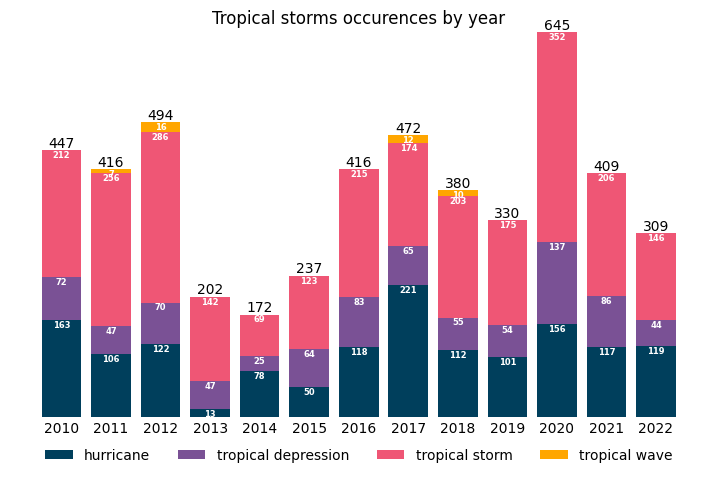

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/storms.csv"
df_storms = pd.read_csv(url)

agg_df = df_storms.groupby(['year', 'status'])['n'].sum().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(9,5))

colors = ['#003f5c', '#7a5195', '#ef5675', '#ffa600']
bottom = np.zeros(len(agg_df))

for i, col in enumerate(agg_df.columns):
  ax.bar(agg_df.index, agg_df[col], bottom=bottom, label=col,
         color=colors[i])
  bottom += np.array(agg_df[col])

totals = agg_df.sum(axis=1)
y_offset = 4
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center')

y_offset = -13
for bar in ax.patches:
    if bar.get_height() == 0:
        continue

    ax.text(
        bar.get_x() + bar.get_width() / 2,        
        bar.get_height() + bar.get_y() + y_offset,        
        round(bar.get_height()),        
        ha='center',
        color='w',
        weight='bold',
        size=6
    )

ax.set_xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
ax.tick_params(axis='x', which='both', length=0)
ax.set_yticks([])  
ax.set_ylabel(None)  

for spine in ax.spines.values():
    spine.set_visible(False)

ax.legend(
    loc='lower center',  
    bbox_to_anchor=(0.5, -0.15),  
    ncol=4,  
    frameon=False  
)

ax.set_title("Tropical storms occurences by year")

plt.show()

#plt.savefig("stacked_bar_storms", dpi=300, bbox_inches='tight', pad_inches=0.2)